In [143]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.dates import MonthLocator, DateFormatter

In [144]:
csv_path = '../data/airline-delay-big.csv'

data = pd.read_csv(csv_path)

cols_remove = ['arr_actual_utc']
for col in cols_remove:
    data.drop(col, axis=1, inplace=True) # remove the column with no header

In [145]:
data.head()

,flight_iata,airline_iata,dep_time_utc,dep_actual_utc,arr_time_utc,dep_iata,arr_iata,dep_country_code,arr_country_code,domestic,international,delayed
0,a12207,a1,2023-09-25 07:50:00,2023-09-25 07:51:00,2023-09-25 09:00:00,TBB,SGN,VN,VN,True,False,-26.0
1,w24207,w2,2023-09-25 07:50:00,2023-09-25 07:51:00,2023-09-25 09:00:00,TBB,SGN,VN,VN,True,False,-26.0
2,h14111,h1,2023-09-25 07:50:00,2023-09-25 07:51:00,2023-09-25 09:00:00,TBB,SGN,VN,VN,True,False,-26.0
3,vj207,vj,2023-09-25 07:50:00,2023-09-25 07:51:00,2023-09-25 09:00:00,TBB,SGN,VN,VN,True,False,-26.0
4,a12207,a1,2023-09-27 07:50:00,2023-09-27 08:01:00,2023-09-27 09:00:00,TBB,SGN,VN,VN,True,False,-18.0


# Data Inspection

Let's go through each attribute (feature) of the data to see if there's any interesting observation 😄

In [146]:
data.flight_iata.value_counts()

flight_iata
vn920     586
k63920    577
ak642     516
vj970     490
vj963     454
         ... 
vn7063      1
vu660       1
w23356      1
a13356      1
qh2052      1
Name: count, Length: 5938, dtype: int64

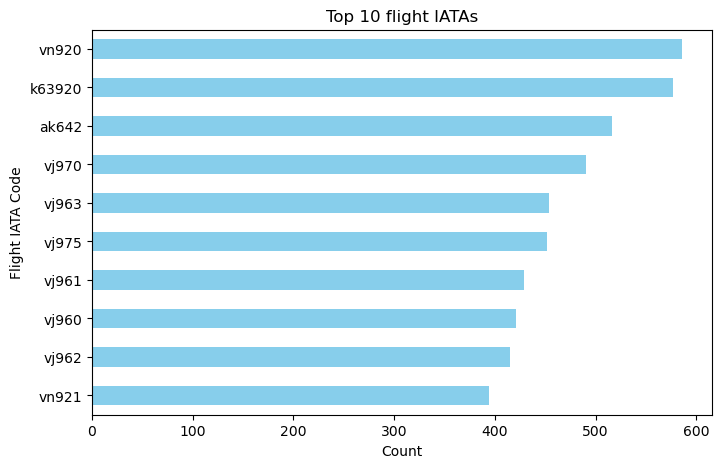

In [147]:
flight_iatas = data.flight_iata.value_counts().head(10)[::-1]

# Plotting the bar plot
plt.figure(figsize=(8, 5))
flight_iatas.plot(kind='barh', color='skyblue')
plt.title('Top 10 flight IATAs')
plt.xlabel('Count')
plt.ylabel('Flight IATA Code')
plt.show()

In [148]:
data.airline_iata.value_counts()

airline_iata
vn     75235
h1     72239
vj     71848
w2     69258
a1     69227
       ...  
ejm        1
qe         1
b3         1
ld         1
te         1
Name: count, Length: 125, dtype: int64

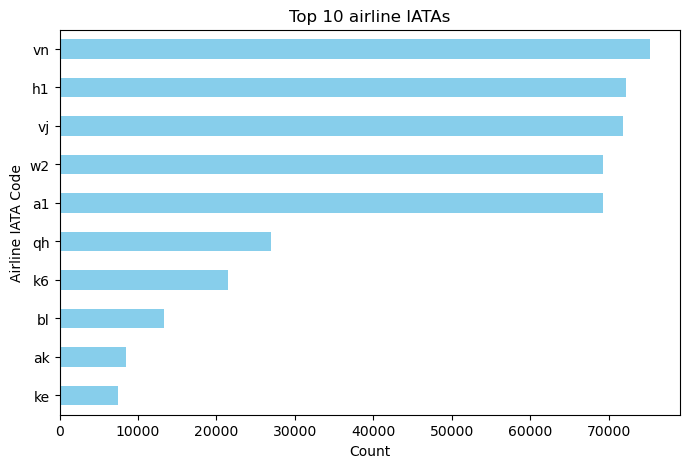

In [149]:
airline_iatas = data.airline_iata.value_counts().head(10)[::-1]

plt.figure(figsize=(8, 5))
airline_iatas.plot(kind='barh', color='skyblue')
plt.title('Top 10 airline IATAs')
plt.xlabel('Count')
plt.ylabel('Airline IATA Code')
plt.show()

In [150]:
unique_dates = data.dep_time_utc.apply(lambda x: x.split(' ')[0]).value_counts()
unique_dates.index = pd.to_datetime(unique_dates.index)
unique_dates_sorted = unique_dates.sort_index()
unique_dates_sorted

dep_time_utc
2022-10-17       3
2022-10-18     912
2022-10-19     930
2022-10-20     899
2022-10-21     951
              ... 
2023-10-12    1773
2023-10-13    1788
2023-10-14    1825
2023-10-15    1966
2023-10-16      49
Name: count, Length: 365, dtype: int64

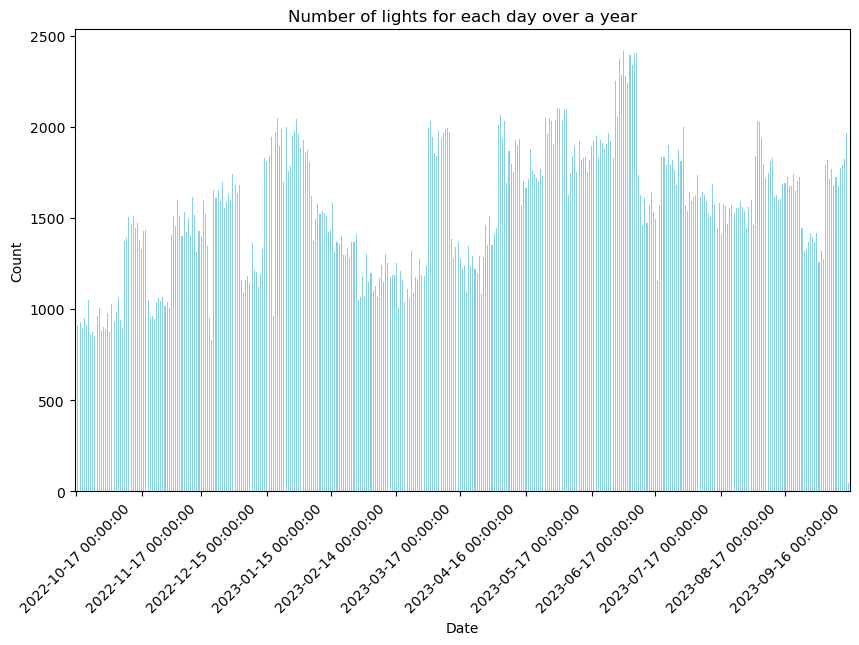

In [151]:
fig, ax = plt.subplots(figsize=(10, 6))
unique_dates_sorted.plot(kind='bar', color='skyblue', ax=ax)

# Set the locator for the x-axis to show only the first day of each month
ax.xaxis.set_major_locator(MonthLocator(bymonthday=1))

# Add labels and title
plt.title('Number of lights for each day over a year')
plt.xlabel('Date')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

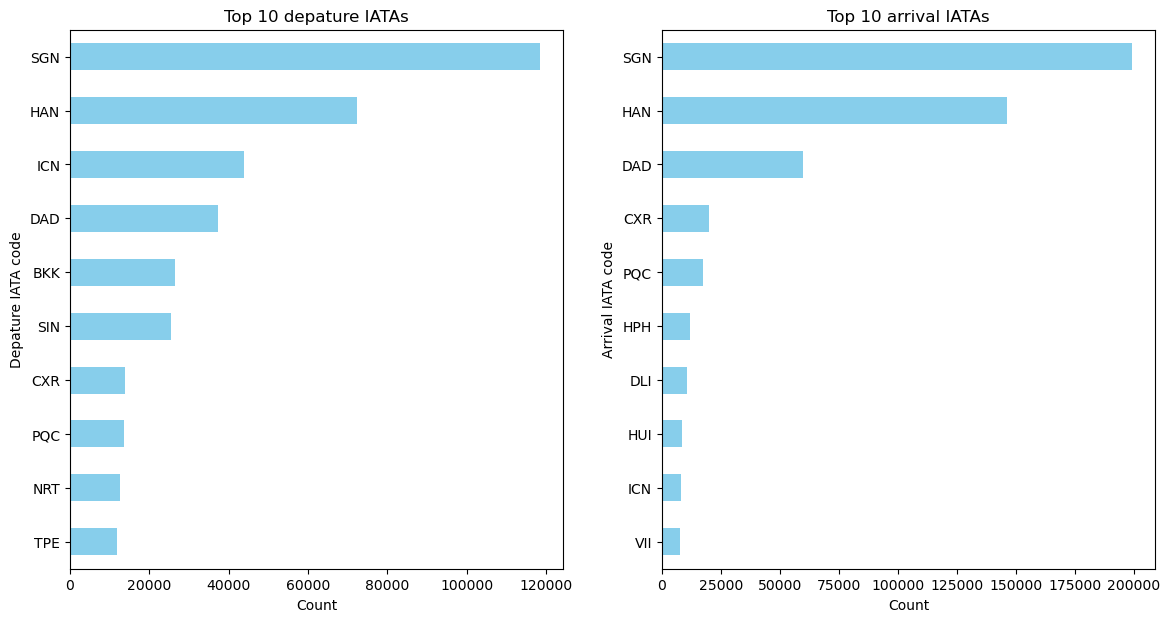

In [152]:
dep_iatas = data.dep_iata.value_counts().head(10)[::-1]
arr_iatas = data.arr_iata.value_counts().head(10)[::-1]

plt.figure(figsize=(14, 7))
plt.subplot(121)
dep_iatas.plot(kind='barh', color='skyblue')
plt.title('Top 10 depature IATAs')
plt.xlabel('Count')
plt.ylabel('Depature IATA code')

plt.subplot(122)
arr_iatas.plot(kind='barh', color='skyblue')
plt.title('Top 10 arrival IATAs')
plt.xlabel('Count')
plt.ylabel('Arrival IATA code')

plt.show()

Looks like Saigon and Hanoi have the most number of flight coming in an out

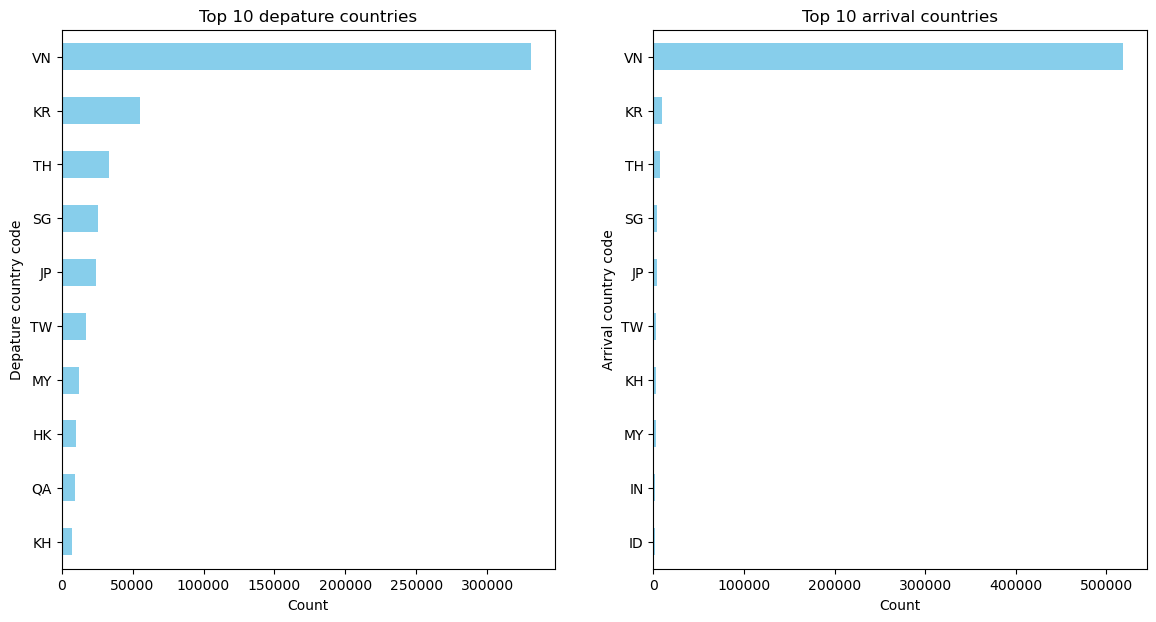

In [153]:
dep_countries = data.dep_country_code.value_counts().head(10)[::-1]
arr_countries = data.arr_country_code.value_counts().head(10)[::-1]

plt.figure(figsize=(14, 7))
plt.subplot(121)
dep_countries.plot(kind='barh', color='skyblue')
plt.title('Top 10 depature countries')
plt.xlabel('Count')
plt.ylabel('Depature country code')

plt.subplot(122)
arr_countries.plot(kind='barh', color='skyblue')
plt.title('Top 10 arrival countries')
plt.xlabel('Count')
plt.ylabel('Arrival country code')

plt.show()

In this dataset, there is a large number of flights coming out of Vietnam and Vietnam is also the main destination as shown in the plot and below

In [154]:
data.arr_country_code.value_counts()['VN']

518535

Now, let's plot the average delay for each day over the course of the year

In [155]:
date_and_delay_cols = ['dep_time_utc', 'delayed']
date_n_delay = data[date_and_delay_cols].copy()
# Select only the date and remove the time
date_n_delay.dep_time_utc = date_n_delay.dep_time_utc.apply(lambda x: x.split(' ')[0])
# Turn strings of date into date time format
date_n_delay.dep_time_utc = pd.to_datetime(date_n_delay.dep_time_utc)
date_n_delay.head()

,dep_time_utc,delayed
0,2023-09-25,-26.0
1,2023-09-25,-26.0
2,2023-09-25,-26.0
3,2023-09-25,-26.0
4,2023-09-27,-18.0


In [156]:
avg_delay_per_date = date_n_delay.groupby('dep_time_utc')['delayed'].mean()
avg_delay_per_date

dep_time_utc
2022-10-17   -53.333333
2022-10-18     3.673246
2022-10-19     4.718280
2022-10-20    -0.233593
2022-10-21     1.262881
                ...    
2023-10-12     5.016920
2023-10-13     2.681767
2023-10-14     3.749589
2023-10-15     6.449644
2023-10-16    17.061224
Name: delayed, Length: 365, dtype: float64

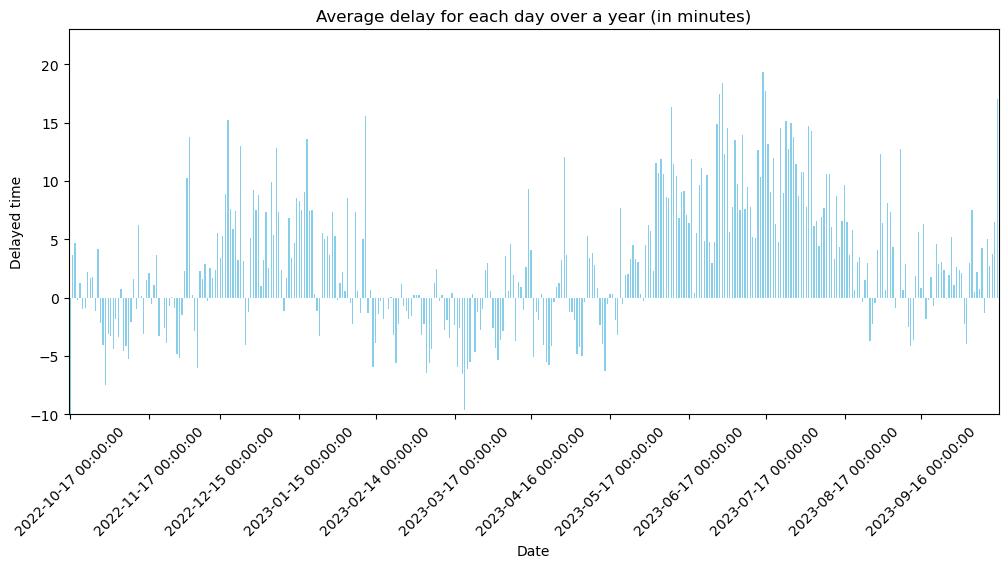

In [157]:
fig, ax = plt.subplots(figsize=(12, 5))
avg_delay_per_date.plot(kind='bar', color='skyblue', ax=ax)

# Set the locator for the x-axis to show only the first day of each month
ax.xaxis.set_major_locator(MonthLocator(bymonthday=1))

# Set the lower bound of the y-axis to -20
ax.set_ylim(bottom=-10)

# Add labels and title
plt.title('Average delay for each day over a year (in minutes)')
plt.xlabel('Date')
plt.ylabel('Delayed time')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

We found something cool here. It looks like during new year holidays (around 15 minutes) and summer vacations (around 20 minutes), the average delayed time is much greater compared to normal time during the year. And maybe it's best to take a flight on Feb, March, or April ✌️